**Notebook to analyse data collected at the plate reader over 20 hours.**

Analysis of the three plate reader experiments for the Cre-lox cumate reporter variants.

## Notes:
- The 3 biological replicates which will be used are from 2025 02/28 (redid Cuma stock on this day), 03/04, 03/06
- In 25/03/06 error in 4uM and 2uM concentration 


In [151]:
%matplotlib inline

import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
import os
import scipy.stats as stats

from matplotlib import figure
from matplotlib import rc
import seaborn as sns
from cycler import cycler  # Import the cycler module
import matplotlib.ticker as ticker
from typing import Tuple

In [152]:
dc =  './data/data_for_analysis/' 

# Preparing dataset

In [153]:
# Get all metadata csv files and load them into dataframes
import glob

# Get list of metadata csv files
metadata_files = glob.glob(os.path.join(dc, 'metadata_*.csv'))
OD_files = glob.glob(os.path.join(dc, 'OD_*.csv'))
F2_files = glob.glob(os.path.join(dc, 'F2_*.csv'))

# Create dataframes for each metadata file
for file in metadata_files:
    # Extract the part of filename after 'metadata_'
    df_name = 'metadata_' + os.path.basename(file).split('metadata_')[1]
    # Remove .csv extension from variable name
    df_name = df_name.replace('.csv','')
    # Read csv into dataframe and assign to dynamically named variable
    globals()[df_name] = pd.read_csv(file)

for file in OD_files:
    # Extract the part of filename after 'metadata_'
    print(file)
    df_name = os.path.splitext(os.path.basename(file))[0]   # "OD_250228"
    globals()[df_name] = pd.read_csv(file).iloc[2:].reset_index(drop=True)
    
for file in F2_files:
    print(file)
    df_name = os.path.splitext(os.path.basename(file))[0]   # "F2_250228"
    globals()[df_name] = pd.read_csv(file).iloc[2:].reset_index(drop=True)



./data/data_for_analysis/OD_250228.csv
./data/data_for_analysis/OD_250304.csv
./data/data_for_analysis/OD_250306.csv
./data/data_for_analysis/F2_250228.csv
./data/data_for_analysis/F2_250306.csv
./data/data_for_analysis/F2_250304.csv


In [154]:
replicates_2025 = {'bEG36':{'conc':['0','3','5','8','10'],'F2':['F2_250228','F2_250304','F2_250306'],'OD':['OD_250228','OD_250304','OD_250306']},
              'bEG39':{'conc':['0','2','4','10'],'F2':['F2_250228','F2_250304','F2_250306'],'OD':['OD_250228','OD_250304','OD_250306']},
              'bEG57':{'conc':['0','3','5','8','10'],'F2':['F2_250228','F2_250304','F2_250306'],'OD':['OD_250228','OD_250304','OD_250306']},
              'bAG56':{'conc':['0','10','50','100'],'F2':['F2_250228','F2_250304','F2_250306'],'OD':['OD_250228','OD_250304','OD_250306']},
              'WT':{'conc':['0'],'F2':['F2_250228','F2_250304','F2_250306'],'OD':['OD_250228','OD_250304','OD_250306']},
                  'blank':{'conc':['0'],'F2':['F2_250228','F2_250304','F2_250306'],'OD':['OD_250228','OD_250304','OD_250306']}}

## Plots

In [155]:
#from https://github.com/hsharsh/matplotlib-plots

from pathlib import Path
from typing import Tuple, Union

from matplotlib.figure import Figure


def save_figure(
    figure: Figure,
    figure_name: str,
    figure_directory: Union[str, Path],
    figure_format: str = "pdf",
    figure_size: Tuple[float, float] = (6.4, 4),
    dpi: int = 300,
    transparent_png: bool = True,
) -> None:
    """Save a matplotlib figure to a file with specified format and settings.

    Args:
        figure: The matplotlib figure to save. If None, creates a new empty figure.
        figure_name: Name of the output file (without extension).
        figure_directory: Directory path where the figure will be saved.
        figure_format: Output format of the figure ('pdf' or 'png'). Defaults to 'pdf'.
        figure_size: Tuple of (width, height) in inches. Defaults to (6.4, 4).
        dpi: Dots per inch for PNG format. Defaults to 300.
        transparent_png: Whether to make PNG background transparent. Defaults to True.

    Raises:
        ValueError: If an unsupported figure format is provided.
        OSError: If there are issues creating the directory or saving the file.
    """
    try:
        # Validate figure format
        figure_format = figure_format.lower()
        if figure_format not in ["pdf", "png"]:
            raise ValueError(f"Unsupported figure format: {figure_format}")

        # Set figure size
        figure.set_size_inches(figure_size, forward=False)

        # Ensure directory exists
        figure_directory = Path(figure_directory)
        figure_directory.mkdir(parents=True, exist_ok=True)

        # Construct save path
        save_path = figure_directory / f"{figure_name}.{figure_format}"

        # Save figure based on format
        if figure_format == "pdf":
            figure.savefig(save_path, bbox_inches="tight")
        elif figure_format == "png":
            # Configure transparency
            alpha = 0 if transparent_png else 1
            figure.patch.set_alpha(alpha)

            # Set transparency for all axes
            for ax in figure.get_axes():
                ax.patch.set_alpha(alpha)

            # Save with PNG-specific settings
            figure.savefig(save_path, bbox_inches="tight", dpi=dpi)

    except OSError as e:
        raise OSError(f"Failed to save figure: {e}") from e
    except Exception as e:
        raise RuntimeError(f"Unexpected error while saving figure: {e}") from e



In [156]:
# Customizing plot elements
color_palette = sns.color_palette("colorblind")
color_palette_2 = sns.color_palette("hsv", 15)
custom_cycler = cycler(color=color_palette)
plt.rc('axes', prop_cycle=custom_cycler)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1

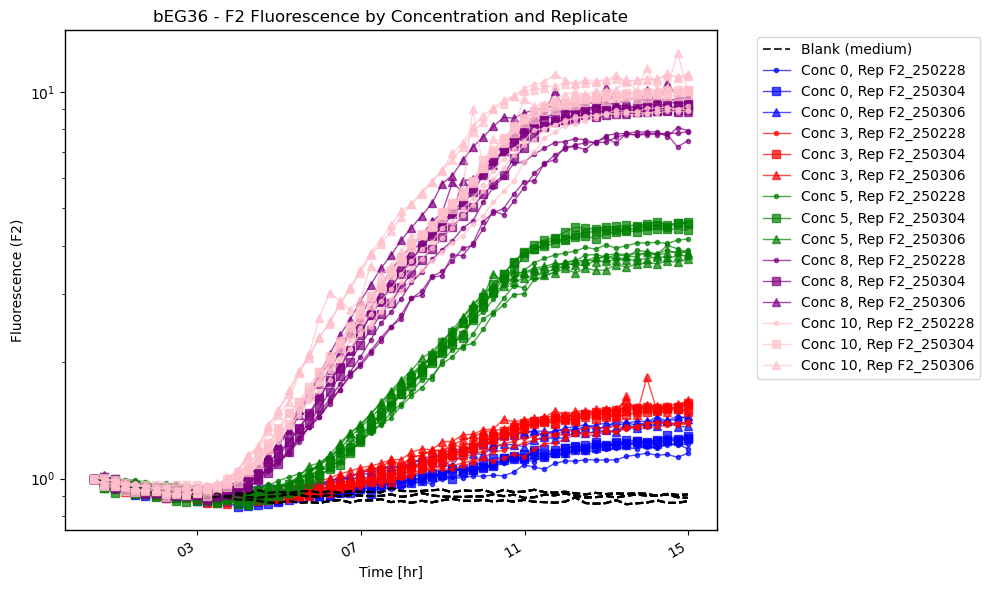

In [157]:
FIG_SIZE = (10, 6)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.xaxis.set_major_locator(md.HourLocator(interval=4))
ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
plt.gcf().autofmt_xdate()  # Auto-format x-axis dates

# Define marker shapes for different replicates_2025
markers = ['.', 's', '^', '*']

# Define colors for different concentrations
colors = ['blue', 'red', 'green', 'purple','pink']

strain_name = 'bEG36'
# For each concentration value
for conc_idx, conc in enumerate(replicates_2025[strain_name]['conc']):
    
    # For each F2 dataframe
    for df_idx, f2_df in enumerate(replicates_2025[strain_name]['F2']):
        
        # Get corresponding metadata filename
        metadata_name = 'metadata_' + f2_df.split('F2_')[1]
        metadata_df = globals()[metadata_name]
        F2_df = globals()[f2_df]
        F2_df["Time"] = pd.to_datetime(F2_df["Time"], format='%H:%M:%S', exact=False)

        time = F2_df["Time"].values
        
        x = F2_df["Time"].values

                # -----------------------------
        # ADD: plot blank (medium)
        # -----------------------------
        blank_cols = metadata_df.columns[
            metadata_df.iloc[0].astype(str) == 'blank'
        ]

        if len(blank_cols) > 0:
            blank_mean = F2_df[blank_cols].mean(axis=1).values.astype(float)
            blank_f0 = blank_mean[0]  ### <<<
            # guard against zero / NaN
            if blank_f0 > 0 and not np.isnan(blank_f0):
                blank_norm = blank_mean / blank_f0
            
                plt.plot(
                    time,
                    blank_norm,
                    color='black',
                    linestyle='--',
                    linewidth=1.5,
                    alpha=0.8,
                    label='Blank (medium)' if (conc_idx == 0 and df_idx == 0) else None
                )

        # Find columns in metadata with matching concentration
        matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & (metadata_df.iloc[0] == strain_name)].index

        # Plot data from matching columns
        for col in matching_cols:
            # raw fluorescence for this well
            y = F2_df[col].values.astype(float)
            
            # choose initial value (first timepoint)
            f0 = y[0]
            
            # guard against zero / NaN initial fluorescence
            if f0 <= 0 or np.isnan(f0):
                continue
            
            # normalize
            y_norm = y / f0
            
            plt.plot(
                F2_df['Time'],
                y_norm,
                marker=markers[df_idx],
                color=colors[conc_idx],
                label=f'Conc {conc}, Rep {f2_df}' if col == matching_cols[0] else None,
                alpha=0.7,
                markersize=6
            )

#ticks = [1,5,9,13]
#plt.gca().set_xticks(ticks)

#ax.tick_params(axis='both', which='major', labelsize=10)

ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.xaxis.set_major_locator(md.HourLocator(interval=4))
ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
plt.gcf().autofmt_xdate()  # Auto-format x-axis dates

plt.xlabel('Time [hr]')
plt.ylabel('Fluorescence (F2)')
plt.title(strain_name + ' - F2 Fluorescence by Concentration and Replicate')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.yscale('log')

# plt.ylim([0.7,1.1])

plt.show()

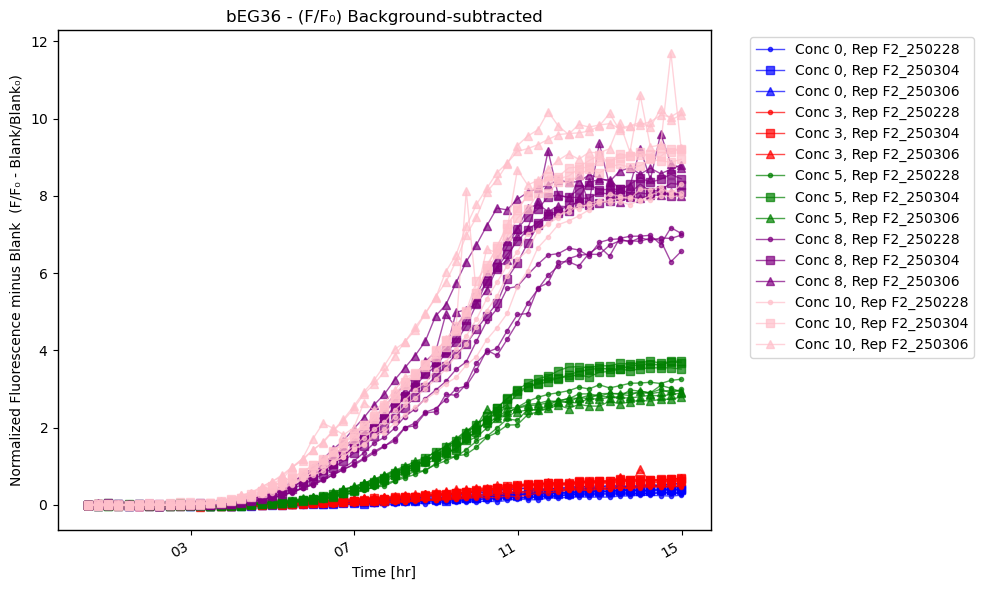

In [158]:
# Create a figure and axis
FIG_SIZE = (10, 6)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.xaxis.set_major_locator(md.HourLocator(interval=4))
ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
plt.gcf().autofmt_xdate()

markers = ['.', 's', '^', '*']
colors = ['blue', 'red', 'green', 'purple', 'pink']

strain_name = 'bEG36'

for conc_idx, conc in enumerate(replicates_2025[strain_name]['conc']):
    for df_idx, f2_df in enumerate(replicates_2025[strain_name]['F2']):

        metadata_name = 'metadata_' + f2_df.split('F2_')[1]
        metadata_df = globals()[metadata_name]
        F2_df = globals()[f2_df]
        F2_df["Time"] = pd.to_datetime(F2_df["Time"], format='%H:%M:%S', exact=False)

        # --- compute normalized blank curve for this file (if present) ---
        blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
        blank_norm = None

        if len(blank_cols) > 0:
            blank_mean = F2_df[blank_cols].mean(axis=1).values.astype(float)
            blank_f0 = blank_mean[0]
            if blank_f0 > 0 and not np.isnan(blank_f0):
                blank_norm = blank_mean / blank_f0

                # # (optional) also plot the blank itself
                # plt.plot(
                #     F2_df['Time'], blank_norm,
                #     color='black', linestyle='--', linewidth=1.5, alpha=0.6,
                #     label='Blank (norm)' if (conc_idx == 0 and df_idx == 0) else None
                # )

        # --- sample wells for this strain/conc ---
        matching_cols = metadata_df.iloc[1][
            (metadata_df.iloc[1] == conc) &
            (metadata_df.iloc[0] == strain_name)
        ].index

        for col in matching_cols:
            y = F2_df[col].values.astype(float)
            f0 = y[0]
            if f0 <= 0 or np.isnan(f0):
                continue

            y_norm = y / f0

            # subtract normalized blank (if available)
            if blank_norm is not None:
                y_corr = y_norm - blank_norm
            else:
                y_corr = y_norm  # fallback: no blank subtraction

            plt.plot(
                F2_df['Time'], y_corr,
                marker=markers[df_idx],
                color=colors[conc_idx],
                label=f'Conc {conc}, Rep {f2_df}' if col == matching_cols[0] else None,
                alpha=0.7,
                markersize=6
            )

ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.xaxis.set_major_locator(md.HourLocator(interval=4))
ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
plt.gcf().autofmt_xdate()

plt.xlabel('Time [hr]')
plt.ylabel('Normalized Fluorescence minus Blank  (F/F₀ - Blank/Blank₀)')
plt.title(strain_name + ' - (F/F₀) Background-subtracted')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# IMPORTANT: subtraction can create values <= 0, so log scale may break.
# Use linear scale, or clamp before log.
# plt.yscale('log')

plt.show()


### For each biological replicate, average of the technical replicates, then median value and hue between min and max

In [159]:
min_x = 0
len_x = 51

bEG36


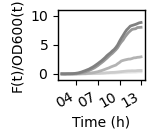

bAG56


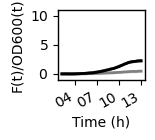

bEG57


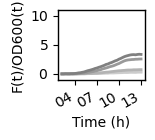

bEG39


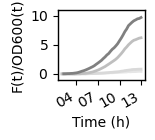

In [160]:
# Only plot data for which OD is above threshold
od_threshold = 0.01

# Create a figure and axis

# Define colors for different concentrations
color_dic = {'100': 0, '50': 25, '10': 50, '8': 60, '5': 70, '4': 75, '3': 80, '2': 85, '0': 90}

strains = ['bEG36','bAG56','bEG57','bEG39']

#for each strain
for strain_name in strains:
    FIG_SIZE = (1.65,1.5)
    fig, ax = plt.subplots(figsize=FIG_SIZE)
    ax.xaxis.set_major_locator(md.HourLocator(interval=4))
    ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
    plt.gcf().autofmt_xdate()  # Auto-format x-axis dates
    # For each concentration value
    for conc_idx, conc in enumerate(replicates_2025[strain_name]['conc']):
        # Lists to store time points and fluorescence values for all replicates
        colors = [color_dic.get(str(conc), 50)/100 for conc in replicates_2025[strain_name]['conc']]
        all_times = []
        all_fluorescence_data = []
        
        # For each F2 dataframe
        for df_idx, f2_df in enumerate(replicates_2025[strain_name]['F2']):
            # bEG39 exclusion
            if strain_name == 'bEG39' and conc in ['2', '4'] and '250306' in f2_df:
                continue
            # Get corresponding metadata filename
            metadata_name = 'metadata_' + f2_df.split('F2_')[1]
            metadata_df = globals()[metadata_name]
            F2_df = globals()[f2_df]
            
            # Get corresponding OD dataframe
            od_df_name = f2_df.replace('F2_', 'OD_')
            OD_df = globals()[od_df_name]
            
            F2_df["Time"] = pd.to_datetime(F2_df["Time"], format='%H:%M:%S', exact=False)
            OD_df["Time"] = pd.to_datetime(OD_df["Time"], format='%H:%M:%S', exact=False)
            time_values = F2_df['Time'].values[:len_x]
            

            # --- compute normalized blank curve: F2_blank(t)/F2_blank(t0) ---
            blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
            
            blank_norm = None
            if len(blank_cols) > 0:
                blank_mean = F2_df[blank_cols].values[min_x:len_x].mean(axis=1).astype(float)
                blank_f0 = blank_mean[0]
                if blank_f0 > 0 and not np.isnan(blank_f0):
                    blank_norm = blank_mean / blank_f0

            # Find columns in metadata with matching concentration
            matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & 
                                            (metadata_df.iloc[0] == strain_name)].index
            
            # Store time points
            all_times.append(time_values[min_x:len_x])
            
            # Store fluorescence/OD ratio data for this replicate and compute average per time point
            replicate_data = []
            for col in matching_cols:
                f2_values = F2_df[col].values[min_x:len_x].astype(float)
                od_values = OD_df[col].values[min_x:len_x].astype(float)

                # --- blank-subtracted OD for thresholding ---
                blank_od = OD_df[blank_cols].values[min_x:len_x].mean(axis=1).astype(float)  # per timepoint
                od_corr = od_values - blank_od
                
                # mask timepoints where blank-subtracted OD is too low
                valid = od_corr >= od_threshold

                # normalize this well by its own t0
                f2_f0 = f2_values[0]
                if f2_f0 <= 0 or np.isnan(f2_f0):
                    continue  # skip this well entirely if t0 is unusable
                
                well_norm = f2_values / f2_f0  # F2(t)/F2(t0)
                
                # subtract normalized blank (if available)
                if blank_norm is not None:
                    y = well_norm - blank_norm
                else:
                    y = well_norm
                
                # apply OD mask (drop low-OD timepoints)
                y_masked = np.full_like(y, np.nan, dtype=float)
                y_masked[valid] = y[valid]
                
                replicate_data.append(y_masked)

            # Average across wells within the same replicate (per time point)
            if replicate_data:
                replicate_avg = np.mean(replicate_data, axis=0)
                all_fluorescence_data.append(replicate_avg)
        
        # Convert to numpy arrays for calculations
        if all_fluorescence_data:
            # Ensure all time points are the same
            # Using the first time series as reference
            reference_time = all_times[0]
            aligned_data = []
            
            for i, time_series in enumerate(all_times):
                if np.array_equal(time_series, reference_time):
                    aligned_data.append(all_fluorescence_data[i])
                else:
                    pass
            
            # Convert aligned_data to numpy array
            aligned_data_array = np.array(aligned_data)
            
            # Calculate median, min, and max across replicates
            median_fluorescence = np.median(aligned_data_array, axis=0)
            mean_fluorescence = np.mean(aligned_data_array, axis=0)
            min_fluorescence = np.min(aligned_data_array, axis=0)
            max_fluorescence = np.max(aligned_data_array, axis=0)
            
            # Plot median with min/max fill
            if strain_name == 'WT':
                color_plot = 'k'
            else:
                color_plot = (colors[conc_idx], colors[conc_idx], colors[conc_idx])

            plt.plot(reference_time, median_fluorescence, 
            # plt.plot(reference_time, mean_fluorescence, 
                    color=color_plot,
                    label=f'{strain_name}, Conc {conc}',
                    linewidth=2)
            
            # plt.fill_between(reference_time, 
            #                 min_fluorescence,
            #                 max_fluorescence,
            #                 color=color_plot,
            #                 alpha=0.3)

    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.xaxis.set_major_locator(md.HourLocator(interval=3))
    ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
    ax.set_ylim(-1,11)
    # ax.set_yscale('log')
    ax.set_yticks([0, 5, 10])
    ax.set_xlabel('Time (h)')
    ax.set_ylabel('F(t)/OD600(t)')
    # plt.title(strain + ' - Average F2/OD Ratio by Concentration')
    # plt.legend(loc='upper left')
    plt.tight_layout()
    print(strain_name)
    save_figure(fig,'AG_'+strain_name+'_F2_average',figure_directory='./',figure_size=FIG_SIZE)
    plt.show()

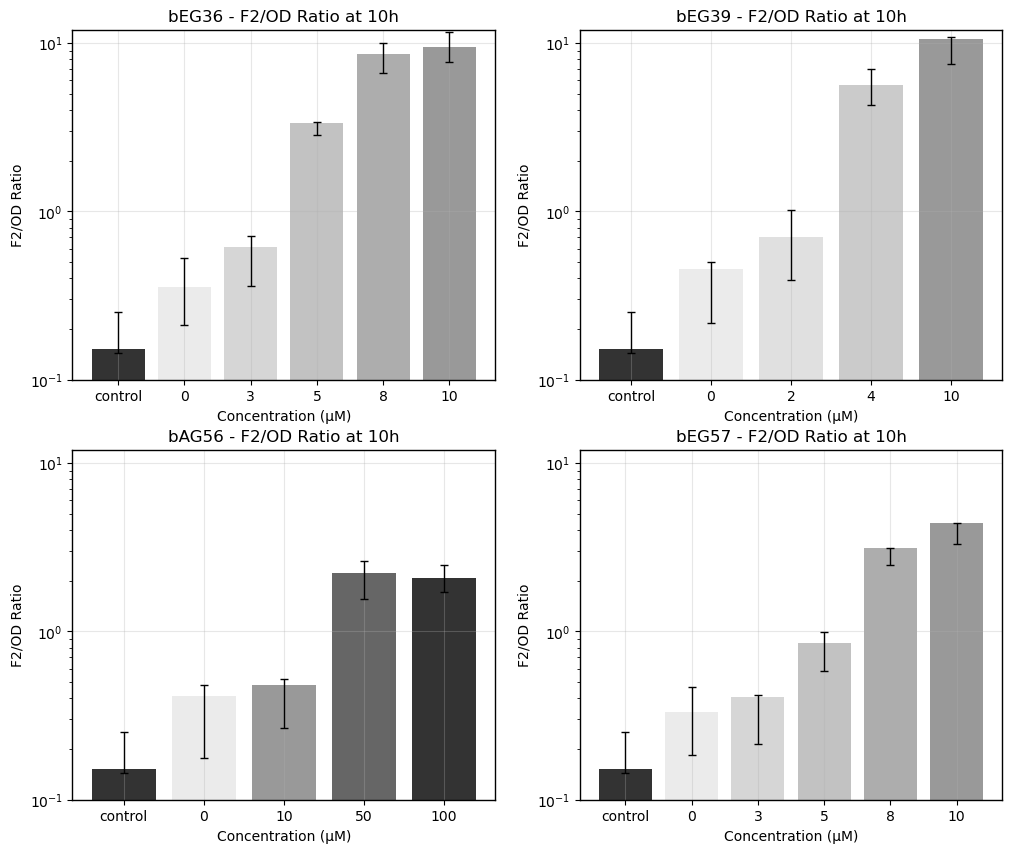


Summary statistics at 10h (raw F2/OD values):

WT (control):
  0μM (10h): median=0.15, min=0.14, max=0.25, n=3 replicates

bEG36:
  0μM (10h): median=0.35, min=0.21, max=0.53, n=3 replicates
      values: [0.211, 0.354, 0.531]
  3μM (10h): median=0.62, min=0.36, max=0.72, n=3 replicates
      values: [0.363, 0.616, 0.716]
  5μM (10h): median=3.33, min=2.83, max=3.38, n=3 replicates
      values: [2.827, 3.329, 3.380]
  8μM (10h): median=8.64, min=6.62, max=9.98, n=3 replicates
      values: [6.618, 8.637, 9.980]
  10μM (10h): median=9.51, min=7.67, max=11.66, n=3 replicates
      values: [7.673, 9.507, 11.658]

bEG39:
  0μM (10h): median=0.46, min=0.22, max=0.50, n=3 replicates
      values: [0.217, 0.503, 0.458]
  2μM (10h): median=0.70, min=0.39, max=1.01, n=2 replicates
      values: [0.393, 1.015]
  4μM (10h): median=5.65, min=4.27, max=7.03, n=2 replicates
      values: [4.270, 7.033]
  10μM (10h): median=10.53, min=7.56, max=10.92, n=3 replicates
      values: [7.556, 10.526, 10

In [161]:
# DOES NOT RELOAD CSV FILE BUT USES PREVIOUS ONE

# Create a bar plot comparing F2/OD values at specific concentrations and time point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def conc_to_gray(conc, color_dic):
    """
    Convert concentration string to matplotlib grayscale color.
    """
    gray_0_100 = color_dic.get(conc, 90)  # if key exists, use it, otherwise default light gray
    gray_0_1 = gray_0_100 / 100
    return str(gray_0_1)  # matplotlib grayscale


# User-defined parameters
target_time_hour = 10  # Target time point to analyze (in hours) - user can modify this

# Define concentrations for each strain
strain_concentrations = {
    'bEG36': ['0', '3', '5', '8', '10'],
    'bEG39': ['0', '2', '4', '10'],
    'bAG56': ['0', '10', '50', '100'],
    'bEG57': ['0', '3', '5', '8', '10'],
    'WT': ['0']
}

# Initialize data storage for target time point
strain_data_target = {}

# Process each strain
for strain_name in ['bEG36', 'bEG39', 'bAG56', 'bEG57', 'WT']:
    strain_data_target[strain_name] = {}
    for conc in strain_concentrations[strain_name]:
        strain_data_target[strain_name][conc] = []
    
    for f2_key in replicates_2025[strain_name]['F2']:
    
        # already loaded + trimmed
        f2_df = globals()[f2_key]
        od_key = f2_key.replace('F2_', 'OD_')
        od_df = globals()[od_key]
    
        # metadata for this plate
        metadata_name = 'metadata_' + f2_key.split('F2_')[1]
        metadata_df = globals()[metadata_name]
    
        # parse time
        f2_df["Time"] = pd.to_datetime(f2_df["Time"], format='%H:%M:%S', exact=False)
        od_df["Time"] = pd.to_datetime(od_df["Time"], format='%H:%M:%S', exact=False)
    
        # closest time index to target_time_hour
        time_hours = f2_df["Time"].dt.hour + f2_df["Time"].dt.minute/60
        target_idx = int(np.argmin(np.abs(time_hours - target_time_hour)))
    
        # ---- blank wells (needed for both F2 and OD corrections) ----
        blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
        if len(blank_cols) == 0:
            continue
    
        # blank fluorescence normalization term: F2_blank(t)/F2_blank(0)
        blank_f2_t0 = f2_df[blank_cols].iloc[0].astype(float).mean()
        blank_f2_t  = f2_df[blank_cols].iloc[target_idx].astype(float).mean()
        if not np.isfinite(blank_f2_t0) or blank_f2_t0 <= 0:
            continue
        blank_f2_norm_t = blank_f2_t / blank_f2_t0
    
        # blank OD term at time t: OD_blank(t)
        blank_od_t = od_df[blank_cols].iloc[target_idx].astype(float).mean()
    
        # ---- per concentration: compute plate-average values ----
        for conc in strain_concentrations[strain_name]:
    
            # bEG39 exclusion
            if strain_name == 'bEG39' and conc in ['2', '4'] and '250306' in f2_key:
                continue
    
            matching_cols = metadata_df.iloc[1][
                (metadata_df.iloc[1] == conc) &
                (metadata_df.iloc[0] == strain_name)
            ].index
    
            if len(matching_cols) == 0:
                continue
    
            vals = []
            for col in matching_cols:
                if col not in f2_df.columns or col not in od_df.columns:
                    print('col', col, ' not found')
                    continue
    
                f2_t0 = float(f2_df[col].iloc[0])          # "F2(0)" after trimming
                f2_t  = float(f2_df[col].iloc[target_idx])
                od_t  = float(od_df[col].iloc[target_idx])
    
                if not np.isfinite(f2_t0) or f2_t0 <= 0:
                    continue
    
                # manuscript definitions:
                # f(t)=F2(t)/F2(0) - F2_blank(t)/F2_blank(0)
                f2_corr = (f2_t / f2_t0) - blank_f2_norm_t
    
                # OD(t)=OD(t) - OD_blank(t)
                od_corr = od_t - blank_od_t
    
                # avoid invalid ratio (and log-scale issues later)
                if np.isfinite(od_corr) and od_corr > 0 and np.isfinite(f2_corr):
                    vals.append(f2_corr / od_corr)
    
            if len(vals) > 0:
                strain_data_target[strain_name][conc].append(float(np.mean(vals))) #average across technical replicates


# Create subplots for each strain (excluding WT)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# # Define grayscale colors for concentrations
# def get_grayscale_colors(concentrations):
#     colors = []
#     n_conc = len(concentrations)
#     for i, conc in enumerate(concentrations):
#         # Create grayscale from light (0.8) to dark (0.2)
#         gray_value = 0.8 - (i / (n_conc - 1)) * 0.6 if n_conc > 1 else 0.5
#         colors.append(str(gray_value))
#     return colors

# Define colors for different concentrations
color_dic = {'100': 0, '50': 25, '10': 50, '8': 60, '5': 70, '4': 75, '3': 80, '2': 85, '0': 90}

      

strain_names = ['bEG36', 'bEG39', 'bAG56', 'bEG57']

# Plot bars for each strain
for strain_idx, strain in enumerate(strain_names):
    ax = axes[strain_idx]
    concentrations = strain_concentrations[strain]
    
    # Add 'control' as the first position for WT data
    all_labels = ['control'] + concentrations

    colors = ['black']  # WT control
    for conc in concentrations:
        colors.append(conc_to_gray(conc, color_dic))

    # Set up x positions for control + concentrations
    x_positions = np.arange(len(all_labels))
    
    # Prepare data for plotting
    medians = []
    error_bars = []
    
    # First add WT control data
    wt_values = strain_data_target['WT']['0']
    if len(wt_values) > 0:
        median_wt = np.median(wt_values)
        min_wt = np.min(wt_values)
        max_wt = np.max(wt_values)
        medians.append(median_wt)
        error_bars.append([[median_wt - min_wt], [max_wt - median_wt]])
    else:
        medians.append(0)
        error_bars.append([[0], [0]])
    
    # Then add strain concentration data
    for conc in concentrations:
        values_target = strain_data_target[strain][conc]
        
        # Calculate statistics for target time point
        if len(values_target) > 0:
            median_target = np.median(values_target)
            min_target = np.min(values_target)
            max_target = np.max(values_target)
            medians.append(median_target)
            error_bars.append([[median_target - min_target], [max_target - median_target]])
        else:
            medians.append(0)
            error_bars.append([[0], [0]])
    
    # Convert error bars to proper format
    error_bars = np.array(error_bars).squeeze().T
    
    # Plot bars for this strain
    bars = ax.bar(x_positions, medians, color=colors, alpha=0.8,
                  yerr=error_bars, capsize=3, error_kw={'elinewidth': 1})
    
    # Customize the subplot
    ax.set_xlabel('Concentration (μM)')
    ax.set_ylabel('F2/OD Ratio')
    ax.set_title(f'{strain} - F2/OD Ratio at {target_time_hour}h')
    ax.set_xticks(x_positions)
    ax.set_yscale('log')
    ax.set_ylim(0.1, 12)
    ax.set_xticklabels(all_labels)
    ax.grid(True, alpha=0.3)

# plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary statistics at {target_time_hour}h (raw F2/OD values):")
print(f"\nWT (control):")
wt_values = strain_data_target['WT']['0']
if len(wt_values) > 0:
    print(f"  0μM ({target_time_hour}h): median={np.median(wt_values):.2f}, "
          f"min={np.min(wt_values):.2f}, max={np.max(wt_values):.2f}, "
          f"n={len(wt_values)} replicates")
else:
    print(f"  0μM ({target_time_hour}h): No data available")

for strain in strain_names:
    print(f"\n{strain}:")
    for conc in strain_concentrations[strain]:
        values_target = strain_data_target[strain][conc]
    
        if len(values_target) > 0:
            values_str = ", ".join(f"{v:.3f}" for v in values_target)
    
            print(
                f"  {conc}μM ({target_time_hour}h): "
                f"median={np.median(values_target):.2f}, "
                f"min={np.min(values_target):.2f}, "
                f"max={np.max(values_target):.2f}, "
                f"n={len(values_target)} replicates"
            )
            print(f"      values: [{values_str}]")
        else:
            print(f"  {conc}μM ({target_time_hour}h): No data available")

#save_figure(fig, 'AG_F2_OD_ratio_comparison_at_10h_all_conc',figure_directory='./')

target_idx 9.983333333333333
blank_F2_norm 0.9358220545817618
matching_cols Index(['C11', 'D5', 'G2'], dtype='object')
matching_cols Index(['C3', 'C8', 'G5'], dtype='object')
matching_cols Index(['F9', 'G3', 'G8'], dtype='object')
matching_cols Index(['C6', 'D2', 'D8'], dtype='object')
matching_cols Index(['B10', 'C7', 'G6'], dtype='object')
matching_cols Index(['C2', 'D7', 'E6'], dtype='object')
matching_cols Index(['D9', 'E4', 'G11'], dtype='object')
matching_cols Index(['E7', 'F4', 'G9'], dtype='object')
matching_cols Index(['B7', 'E8', 'F2'], dtype='object')
matching_cols Index([], dtype='object')
target_idx 9.983333333333333
blank_F2_norm 0.8812954226698967
matching_cols Index(['D2', 'F11', 'G4'], dtype='object')
matching_cols Index(['D5', 'F3', 'F8'], dtype='object')
matching_cols Index(['C9', 'D3', 'D8'], dtype='object')
matching_cols Index(['F6', 'G2', 'G8'], dtype='object')
matching_cols Index(['D6', 'E10', 'F7'], dtype='object')
matching_cols Index(['B6', 'F2', 'G7'], dtype='

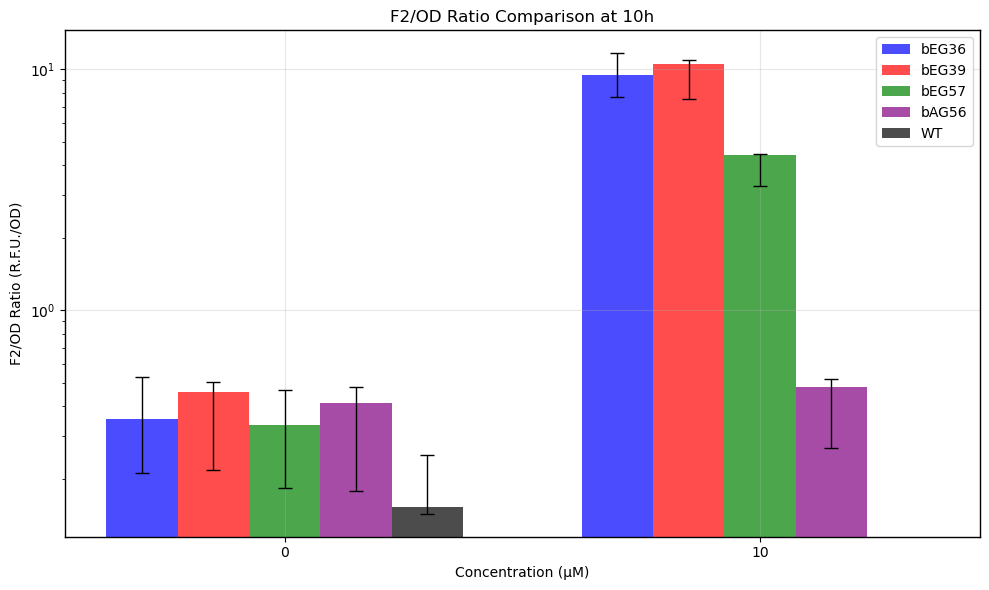


Summary statistics at 10h:

bEG36:
  0μM: median=0.35, min=0.21, max=0.53, n=3 replicates
  10μM: median=9.51, min=7.67, max=11.66, n=3 replicates

bEG39:
  0μM: median=0.46, min=0.22, max=0.50, n=3 replicates
  10μM: median=10.53, min=7.56, max=10.92, n=3 replicates

bEG57:
  0μM: median=0.33, min=0.18, max=0.47, n=3 replicates
  10μM: median=4.43, min=3.29, max=4.43, n=3 replicates

bAG56:
  0μM: median=0.41, min=0.18, max=0.48, n=3 replicates
  10μM: median=0.48, min=0.27, max=0.52, n=3 replicates

WT:
  0μM: median=0.15, min=0.14, max=0.25, n=3 replicates
  10μM: No data available


In [162]:
# Create a bar plot comparing F2/OD values at specific concentrations and time point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# User-defined parameters
target_time_hour = 10  # Time point to analyze (in hours) - user can modify this
target_concentrations = ['0', '10']  # Concentrations to compare

# Initialize data storage
strain_data = {}

# Process each strain
for strain_name in ['bEG36', 'bEG39', 'bEG57', 'bAG56', 'WT']:
    strain_data[strain_name] = {'0': [], '10': []}
    
for f2_key in replicates_2025[strain_name]['F2']:

    # already loaded + trimmed
    f2_df = globals()[f2_key]
    od_key = f2_key.replace('F2_', 'OD_')
    od_df = globals()[od_key]

    # metadata for this plate
    metadata_name = 'metadata_' + f2_key.split('F2_')[1]
    metadata_df = globals()[metadata_name]

    # parse time
    f2_df["Time"] = pd.to_datetime(f2_df["Time"], format='%H:%M:%S', exact=False)
    od_df["Time"] = pd.to_datetime(od_df["Time"], format='%H:%M:%S', exact=False)

    # closest time index to target_time_hour
    time_hours = f2_df["Time"].dt.hour + f2_df["Time"].dt.minute/60
    target_idx = int(np.argmin(np.abs(time_hours - target_time_hour)))
    print('target_idx', time_hours[target_idx])

    # --- identify blank wells ---
    blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
            
    blank_F2_norm = 0.0 #initializing values at 0
    blank_OD_t = 0.0
            
    if len(blank_cols) > 0:
        # blank F2(t) and F2(0)
        blank_f2_t_vals = []
        blank_f2_0_vals = []
        blank_od_t_vals = []
            
        for col in blank_cols:
            if col in f2_df.columns and col in od_df.columns:
                blank_f2_t_vals.append(float(f2_df[col].iloc[target_idx]))
                blank_f2_0_vals.append(float(f2_df[col].iloc[0]))
                blank_od_t_vals.append(float(od_df[col].iloc[target_idx]))
        
        # average across blank wells (if present)
        if len(blank_f2_t_vals) > 0:
            blank_F2_t = np.mean(blank_f2_t_vals)
            blank_F2_0 = np.mean(blank_f2_0_vals)
            blank_OD_t = np.mean(blank_od_t_vals)
            
            # normalized blank fluorescence term: F2_blank(t)/F2_blank(0)
            if blank_F2_0 > 0 and not np.isnan(blank_F2_0):
                blank_F2_norm = blank_F2_t / blank_F2_0
                print('blank_F2_norm', blank_F2_norm)
            else:
                blank_F2_norm = 0.0
    else:
        # no blanks found -> treat as zero correction
        blank_F2_norm = 0.0
        blank_OD_t = 0.0

    # For each target concentration
    for strain_name in ['bEG36', 'bEG39', 'bEG57', 'bAG56', 'WT']:
        for conc in target_concentrations:
            # Find wells with matching strain and concentration
            matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & 
                                                (metadata_df.iloc[0] == strain_name)].index

            print('matching_cols', matching_cols)
            
            if len(matching_cols) > 0:
                # Calculate F2/OD values at target time point for matching wells
                f2_od_values = []
                for col in matching_cols:
                    if col in f2_df.columns and col in od_df.columns:
                        f2_t = float(f2_df[col].iloc[target_idx])
                        f2_0 = float(f2_df[col].iloc[0])
                        
                        od_t = float(od_df[col].iloc[target_idx])
                        
                        # OD blank subtraction: OD(t) - OD_blank(t)
                        od_corr = od_t - blank_OD_t
                        
                        # skip if corrected OD is not usable
                        if od_corr <= 0 or np.isnan(od_corr):
                            continue
                        
                        # fluorescence metric: F2(t)/F2(0) - F2_blank(t)/F2_blank(0)
                        if f2_0 <= 0 or np.isnan(f2_0):
                            continue
                        
                        f2_norm = f2_t / f2_0
                        f2_corr = f2_norm - blank_F2_norm
                        
                        # now combine as (corrected normalized fluorescence) / (blank-subtracted OD)
                        f2_od_values.append(f2_corr / od_corr)

                # Calculate average for this replicate plate
                if f2_od_values:
                    plate_average = np.mean(f2_od_values)
                    strain_data[strain_name][conc].append(plate_average)

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each strain
strain_colors = {
    'bEG36': 'blue',
    'bEG39': 'red', 
    'bEG57': 'green',
    'bAG56': 'purple',
    'WT': 'black'
}

# Set up bar positions
x_positions = [0, 1]  # Positions for 0 and 10 uM
bar_width = 0.15
strain_names = ['bEG36', 'bEG39', 'bEG57', 'bAG56', 'WT']

# Plot bars for each strain
for i, strain in enumerate(strain_names):
    medians = []
    errors_min = []
    errors_max = []
    
    for conc in target_concentrations:
        values = strain_data[strain][conc]
        if len(values) > 0:
            median_val = np.median(values)
            min_val = np.min(values)
            max_val = np.max(values)
            
            medians.append(median_val)
            errors_min.append(median_val - min_val)
            errors_max.append(max_val - median_val)
        else:
            medians.append(0)
            errors_min.append(0)
            errors_max.append(0)
    
    # Calculate bar positions for this strain
    positions = [x + i * bar_width for x in x_positions]
    
    # Create asymmetric error bars
    error_bars = [errors_min, errors_max]
    
    # Plot bars
    ax.bar(positions, medians, bar_width, 
           label=strain, color=strain_colors[strain], alpha=0.7,
           yerr=error_bars, capsize=5, error_kw={'elinewidth': 1})

# Customize the plot
ax.set_xlabel('Concentration (μM)')
ax.set_ylabel('F2/OD Ratio (R.F.U./OD)')
ax.set_title(f'F2/OD Ratio Comparison at {target_time_hour}h')
ax.set_xticks([x + bar_width * 2 for x in x_positions])
ax.set_xticklabels(['0', '10'])
ax.legend()
ax.set_yscale('log')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary statistics at {target_time_hour}h:")
for strain in strain_names:
    print(f"\n{strain}:")
    for conc in target_concentrations:
        values = strain_data[strain][conc]
        if len(values) > 0:
            print(f"  {conc}μM: median={np.median(values):.2f}, "
                  f"min={np.min(values):.2f}, max={np.max(values):.2f}, "
                  f"n={len(values)} replicates")
        else:
            print(f"  {conc}μM: No data available")

#save_figure(fig, 'AG_F2_OD_ratio_comparison_at_10h_10uM',figure_directory='./',figure_size = FIG_SIZE)



### Individual replicate plots

Text(0.5, 0.95, 'bEG36 - OD by Concentration and Replicate')

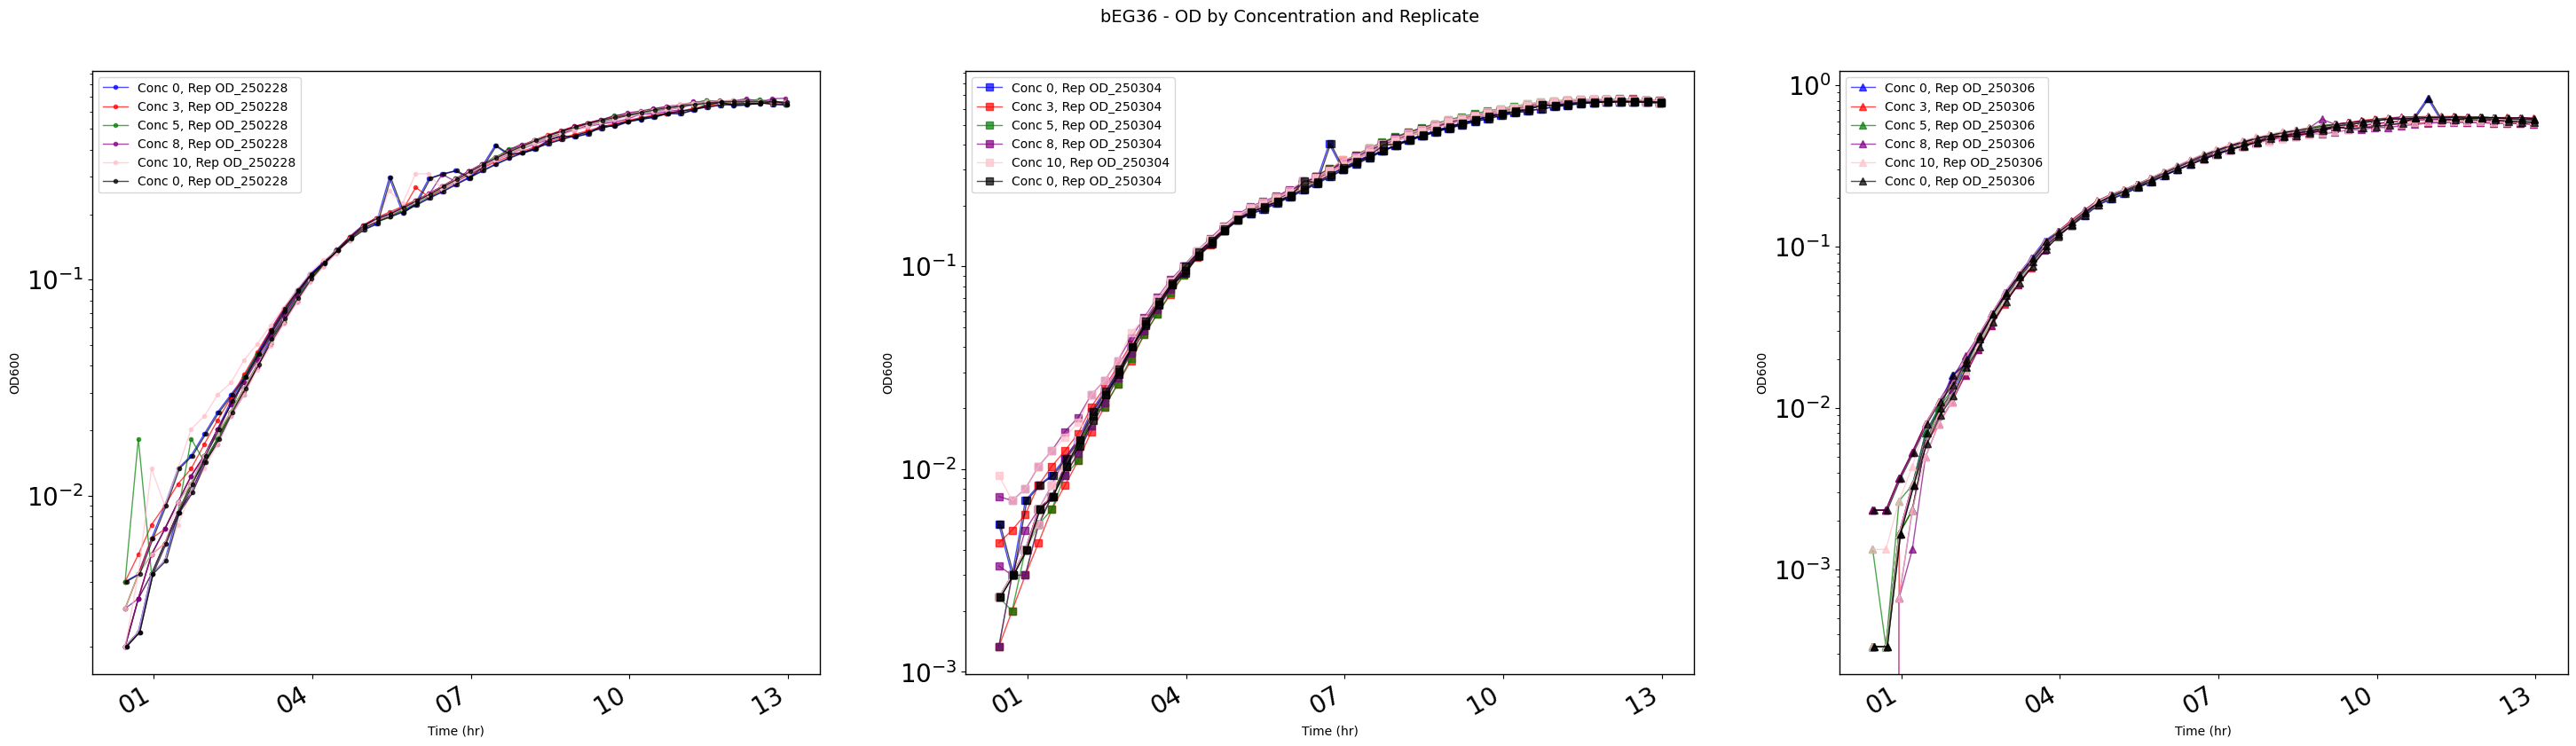

In [163]:
# Create a figure and axis
FIG_SIZE = (36, 10)
fig, ax = plt.subplots(1,3,figsize=FIG_SIZE)
plt.gcf().autofmt_xdate()  # Auto-format x-axis dates


# Define marker shapes for different replicates_2025
markers = ['.', 's', '^', '*']

# Define colors for different concentrations
colors = ['blue', 'red', 'green', 'purple','pink']

strain_name = 'bEG36'
# For each concentration value
for conc_idx, conc in enumerate(replicates_2025[strain_name]['conc']):
    
    # For each OD dataframe
    for df_idx, od_df in enumerate(replicates_2025[strain_name]['OD']):
        
        # Get corresponding metadata filename
        metadata_name = 'metadata_' + od_df.split('OD_')[1]
        metadata_df = globals()[metadata_name]
        OD_df = globals()[od_df]
        OD_df["Time"] = pd.to_datetime(OD_df["Time"],format = '%H:%M:%S',exact = False)
        x = OD_df["Time"].values[:len_x]

        blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
        blank_OD_t = 0.0
        if len(blank_cols) > 0:
            blank_od_t_vals = np.mean(OD_df[blank_cols].values[:len_x], axis = 1)
        
        # Find columns in metadata with matching concentration
        matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & (metadata_df.iloc[0] == strain_name)].index #this gets the well names of samples with the right strains and concentrations (should be 3)


        
        # Plot data from matching columns
        for col in matching_cols:
            od_corr = OD_df[col].values[:len_x] - blank_od_t_vals
            ax[df_idx].plot(x,od_corr, 
                    marker=markers[df_idx],
                    color=colors[conc_idx],
                    label=f'Conc {conc}, Rep {od_df}' if col == matching_cols[0] else None,
                    alpha=0.7,
                    markersize=6)

control_strain = 'WT'
# For each concentration value
for conc_idx, conc in enumerate(replicates_2025[control_strain]['conc']):
    
    # For each F2 dataframe
    for df_idx, od_df in enumerate(replicates_2025[control_strain]['OD']):
        
        # Get corresponding metadata filename
        metadata_name = 'metadata_' + od_df.split('OD_')[1]
        metadata_df = globals()[metadata_name]
        OD_df = globals()[od_df]
        OD_df["Time"] = pd.to_datetime(OD_df["Time"],format = '%H:%M:%S',exact = False)
        x = F2_df["Time"].values[:len_x]

        blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
        blank_OD_t = 0.0
        if len(blank_cols) > 0:
            blank_od_t_vals = np.mean(OD_df[blank_cols].values[:len_x], axis = 1)
        
        # Find columns in metadata with matching concentration
        matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & (metadata_df.iloc[0] == strain_name)].index #this gets the well names of samples with the right strains and concentrations (should be 3)


        
        # Plot data from matching columns
        for col in matching_cols:
            od_corr = OD_df[col].values[:len_x] - blank_od_t_vals
            ax[df_idx].plot(x,od_corr, 
                    marker=markers[df_idx],
                    color='k',
                    label=f'Conc {conc}, Rep {od_df}' if col == matching_cols[0] else None,
                    alpha=0.7,
                    markersize=6)          
    
ticks = [1,5,9,13]            

for i in range(3):
    #ax[i].set_xticks(ticks)
    ax[i].tick_params(axis='both', which='major', labelsize=20)
    ax[i].xaxis.set_major_locator(md.HourLocator(interval=3))
    ax[i].xaxis.set_major_formatter(md.DateFormatter('%H'))
    #ax[i].set_ylim(-0.1,0.9)
    ax[i].set_xlabel('Time (hr)')
    ax[i].set_ylabel('OD600')
    

    ax[i].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax[i].legend(loc = 'upper left')
    ax[i].set_yscale('log')


#plt.gcf().autofmt_xdate()  # Auto-format x-axis dates

fig.suptitle('bEG36 - OD by Concentration and Replicate', fontsize=14, y=0.95)
#plt.show()


Text(0.5, 0.95, 'bEG39 - OD by Concentration and Replicate')

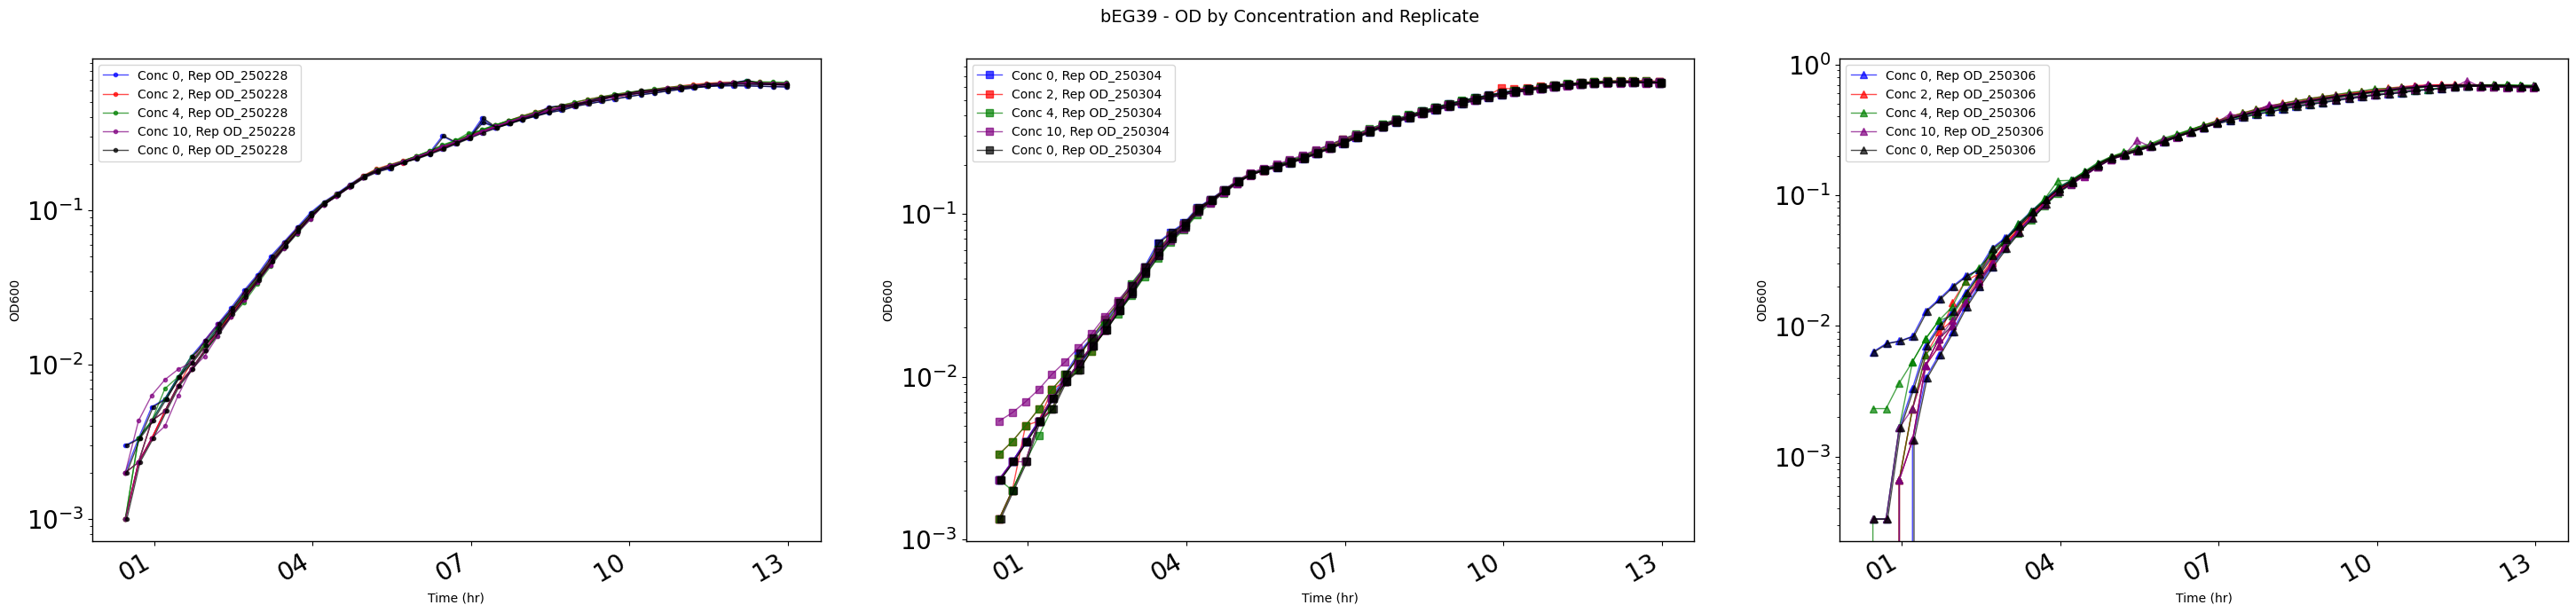

In [164]:
# Create a figure and axis
FIG_SIZE = (36, 8)
fig, ax = plt.subplots(1,3,figsize=FIG_SIZE)
plt.gcf().autofmt_xdate()  # Auto-format x-axis dates


# Define marker shapes for different replicates_2025
markers = ['.', 's', '^', '*']

# Define colors for different concentrations
colors = ['blue', 'red', 'green', 'purple','pink']

strain_name = 'bEG39'
# For each concentration value
for conc_idx, conc in enumerate(replicates_2025[strain_name]['conc']):
    
    # For each OD dataframe
    for df_idx, od_df in enumerate(replicates_2025[strain_name]['OD']):
        
        # Get corresponding metadata filename
        metadata_name = 'metadata_' + od_df.split('OD_')[1]
        metadata_df = globals()[metadata_name]
        OD_df = globals()[od_df]
        OD_df["Time"] = pd.to_datetime(OD_df["Time"],format = '%H:%M:%S',exact = False)
        x = OD_df["Time"].values[:len_x]

        blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
        blank_OD_t = 0.0
        if len(blank_cols) > 0:
            blank_od_t_vals = np.mean(OD_df[blank_cols].values[:len_x], axis = 1)
        
        # Find columns in metadata with matching concentration
        matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & (metadata_df.iloc[0] == strain_name)].index #this gets the well names of samples with the right strains and concentrations (should be 3)


        
        # Plot data from matching columns
        for col in matching_cols:
            od_corr = OD_df[col].values[:len_x] - blank_od_t_vals
            ax[df_idx].plot(x,od_corr, 
                    marker=markers[df_idx],
                    color=colors[conc_idx],
                    label=f'Conc {conc}, Rep {od_df}' if col == matching_cols[0] else None,
                    alpha=0.7,
                    markersize=6)

control_strain = 'WT'
# For each concentration value
for conc_idx, conc in enumerate(replicates_2025[control_strain]['conc']):
    
    # For each F2 dataframe
    for df_idx, od_df in enumerate(replicates_2025[control_strain]['OD']):
        
        # Get corresponding metadata filename
        metadata_name = 'metadata_' + od_df.split('OD_')[1]
        metadata_df = globals()[metadata_name]
        OD_df = globals()[od_df]
        OD_df["Time"] = pd.to_datetime(OD_df["Time"],format = '%H:%M:%S',exact = False)
        x = F2_df["Time"].values[:len_x]

        blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
        blank_OD_t = 0.0
        if len(blank_cols) > 0:
            blank_od_t_vals = np.mean(OD_df[blank_cols].values[:len_x], axis = 1)
        
        # Find columns in metadata with matching concentration
        matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & (metadata_df.iloc[0] == strain_name)].index #this gets the well names of samples with the right strains and concentrations (should be 3)


        
        # Plot data from matching columns
        for col in matching_cols:
            od_corr = OD_df[col].values[:len_x] - blank_od_t_vals
            ax[df_idx].plot(x,od_corr, 
                    marker=markers[df_idx],
                    color='k',
                    label=f'Conc {conc}, Rep {od_df}' if col == matching_cols[0] else None,
                    alpha=0.7,
                    markersize=6)           
    
ticks = [1,5,9,13]            

for i in range(3):
    #ax[i].set_xticks(ticks)
    ax[i].tick_params(axis='both', which='major', labelsize=20)
    ax[i].xaxis.set_major_locator(md.HourLocator(interval=3))
    ax[i].xaxis.set_major_formatter(md.DateFormatter('%H'))
    #ax[i].set_ylim(-0.1,0.9)
    ax[i].set_xlabel('Time (hr)')
    ax[i].set_ylabel('OD600')
    

    ax[i].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax[i].legend(loc = 'upper left')
    ax[i].set_yscale('log')


#plt.gcf().autofmt_xdate()  # Auto-format x-axis dates

fig.suptitle('bEG39 - OD by Concentration and Replicate', fontsize=14, y=0.95)
#plt.show()


Text(0.5, 0.95, 'bAG56 - OD by Concentration and Replicate')

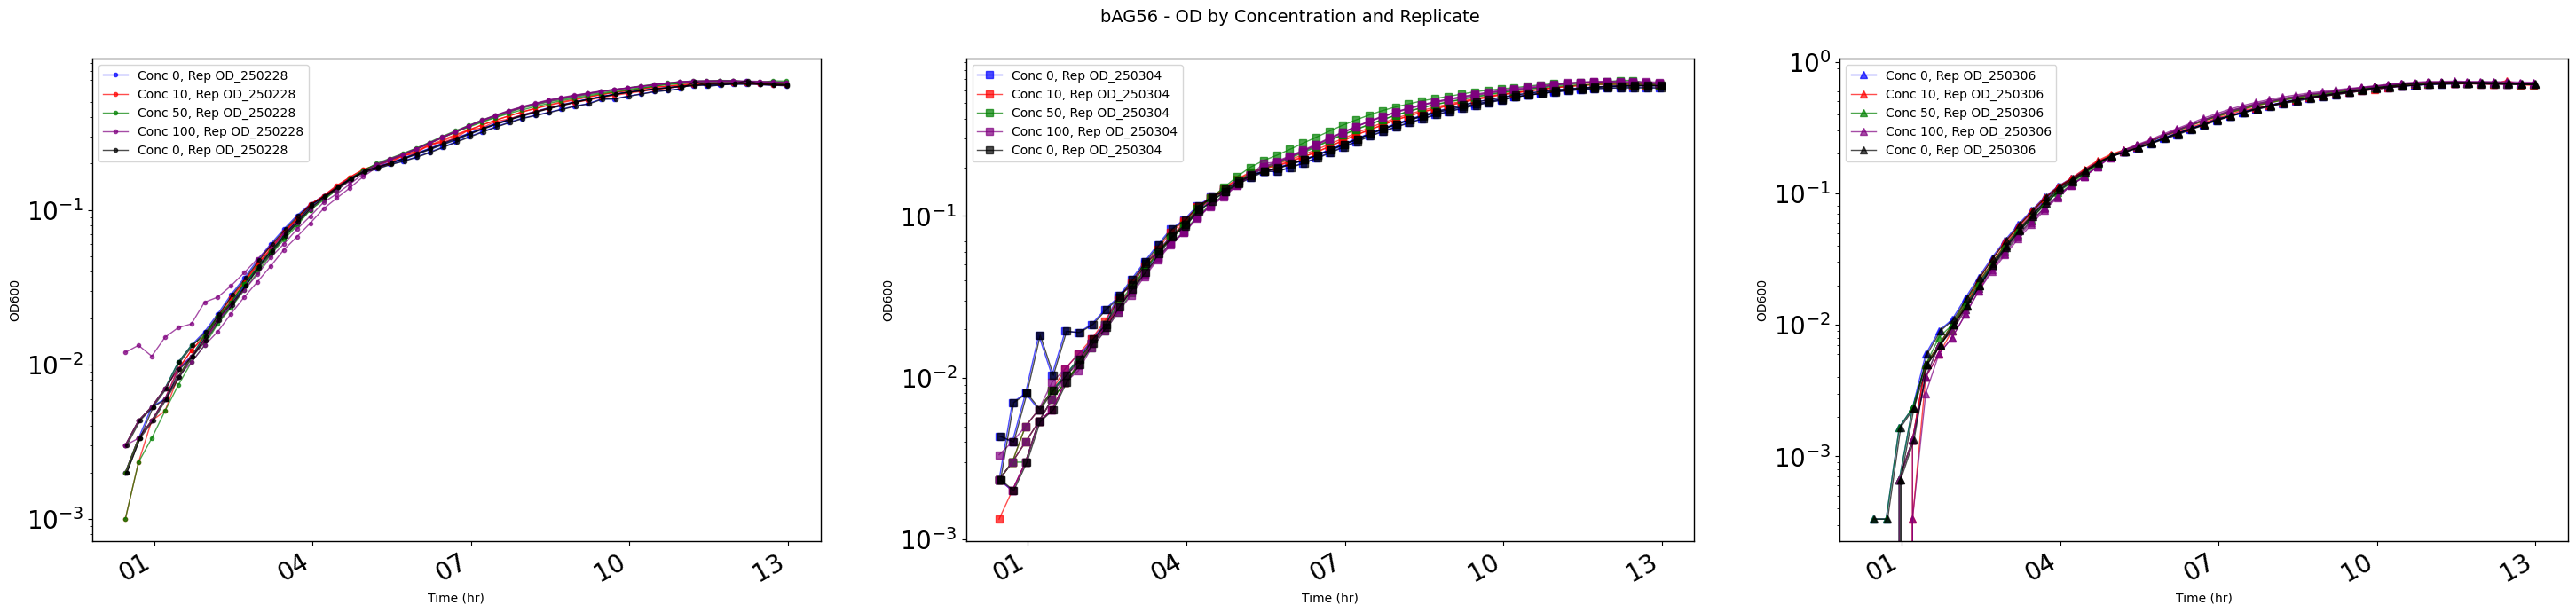

In [165]:
# Create a figure and axis
FIG_SIZE = (36, 8)
fig, ax = plt.subplots(1,3,figsize=FIG_SIZE)
plt.gcf().autofmt_xdate()  # Auto-format x-axis dates


# Define marker shapes for different replicates_2025
markers = ['.', 's', '^', '*']

# Define colors for different concentrations
colors = ['blue', 'red', 'green', 'purple','pink']

strain_name = 'bAG56'
# For each concentration value
for conc_idx, conc in enumerate(replicates_2025[strain_name]['conc']):
    
    # For each OD dataframe
    for df_idx, od_df in enumerate(replicates_2025[strain_name]['OD']):
        
        # Get corresponding metadata filename
        metadata_name = 'metadata_' + od_df.split('OD_')[1]
        metadata_df = globals()[metadata_name]
        OD_df = globals()[od_df]
        OD_df["Time"] = pd.to_datetime(OD_df["Time"],format = '%H:%M:%S',exact = False)
        x = OD_df["Time"].values[:len_x]

        blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
        blank_OD_t = 0.0
        if len(blank_cols) > 0:
            blank_od_t_vals = np.mean(OD_df[blank_cols].values[:len_x], axis = 1)
        
        # Find columns in metadata with matching concentration
        matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & (metadata_df.iloc[0] == strain_name)].index #this gets the well names of samples with the right strains and concentrations (should be 3)


        
        # Plot data from matching columns
        for col in matching_cols:
            od_corr = OD_df[col].values[:len_x] - blank_od_t_vals
            ax[df_idx].plot(x,od_corr, 
                    marker=markers[df_idx],
                    color=colors[conc_idx],
                    label=f'Conc {conc}, Rep {od_df}' if col == matching_cols[0] else None,
                    alpha=0.7,
                    markersize=6)

control_strain = 'WT'
# For each concentration value
for conc_idx, conc in enumerate(replicates_2025[control_strain]['conc']):
    
    # For each F2 dataframe
    for df_idx, od_df in enumerate(replicates_2025[control_strain]['OD']):
        
        # Get corresponding metadata filename
        metadata_name = 'metadata_' + od_df.split('OD_')[1]
        metadata_df = globals()[metadata_name]
        OD_df = globals()[od_df]
        OD_df["Time"] = pd.to_datetime(OD_df["Time"],format = '%H:%M:%S',exact = False)
        x = F2_df["Time"].values[:len_x]

        blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
        blank_OD_t = 0.0
        if len(blank_cols) > 0:
            blank_od_t_vals = np.mean(OD_df[blank_cols].values[:len_x], axis = 1)
        
        # Find columns in metadata with matching concentration
        matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & (metadata_df.iloc[0] == strain_name)].index #this gets the well names of samples with the right strains and concentrations (should be 3)


        
        # Plot data from matching columns
        for col in matching_cols:
            od_corr = OD_df[col].values[:len_x] - blank_od_t_vals
            ax[df_idx].plot(x,od_corr, 
                    marker=markers[df_idx],
                    color='k',
                    label=f'Conc {conc}, Rep {od_df}' if col == matching_cols[0] else None,
                    alpha=0.7,
                    markersize=6)     
ticks = [1,5,9,13]            

for i in range(3):
    ax[i].tick_params(axis='both', which='major', labelsize=20)
    ax[i].xaxis.set_major_locator(md.HourLocator(interval=3))
    ax[i].xaxis.set_major_formatter(md.DateFormatter('%H'))
    #ax[i].set_ylim(-0.1,0.9)
    ax[i].set_xlabel('Time (hr)')
    ax[i].set_ylabel('OD600')
    

    ax[i].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax[i].legend(loc = 'upper left')
    ax[i].set_yscale('log')



#plt.gcf().autofmt_xdate()  # Auto-format x-axis dates

fig.suptitle('bAG56 - OD by Concentration and Replicate', fontsize=14, y=0.95)
#plt.show()


Text(0.5, 0.95, 'bEG57 - OD by Concentration and Replicate')

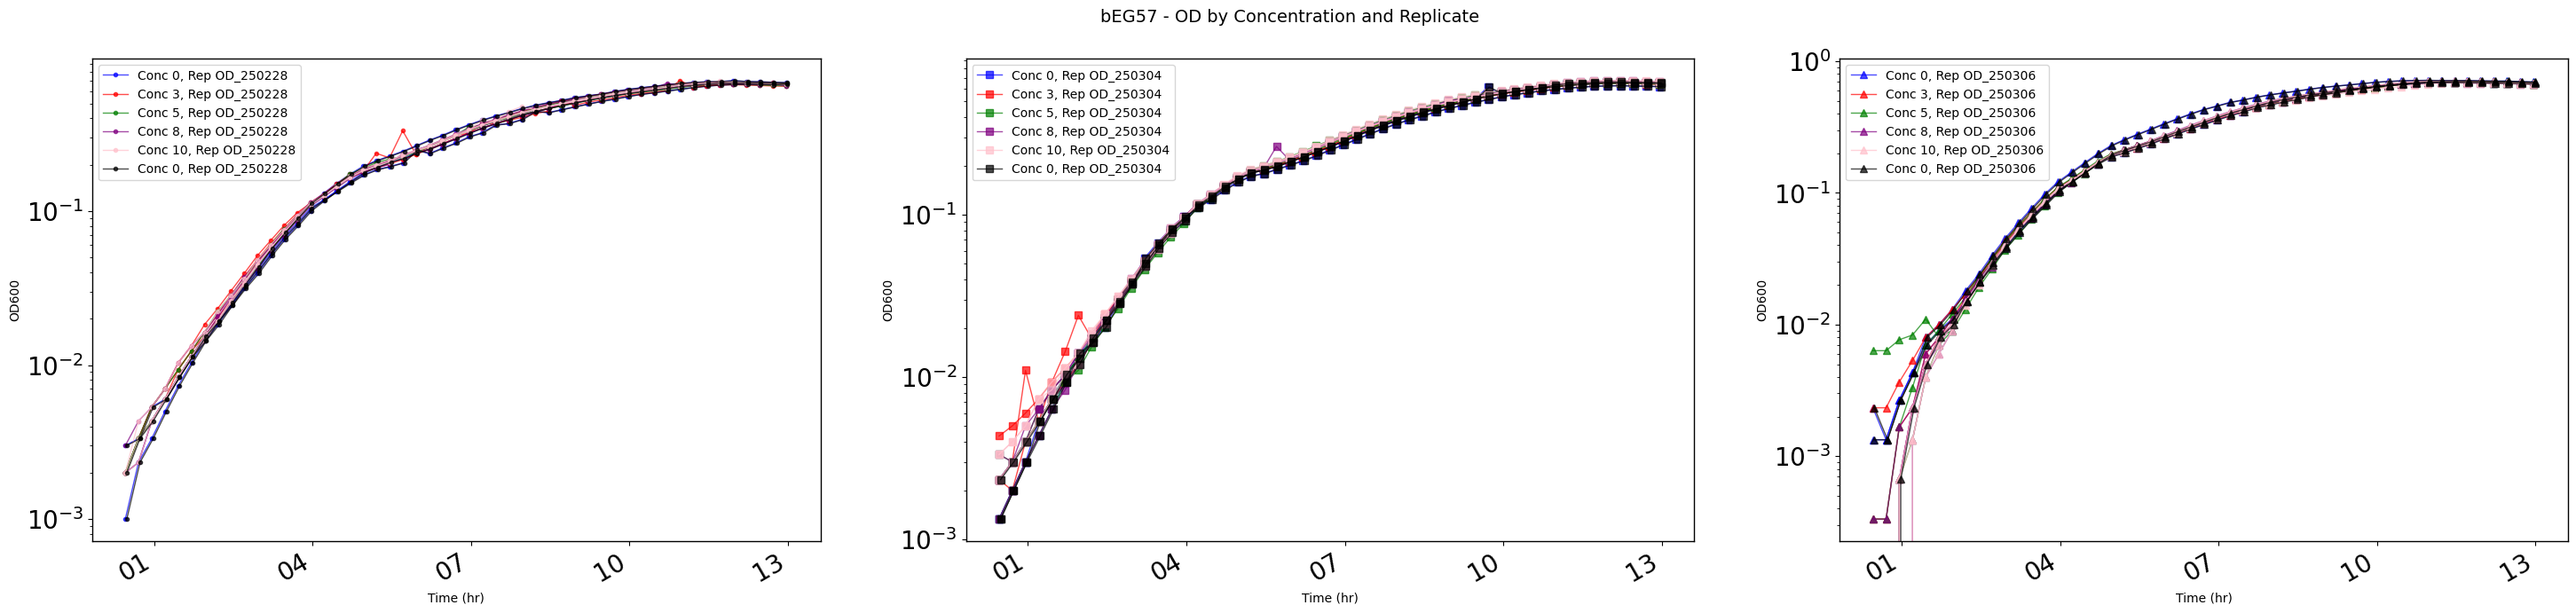

In [72]:
# Create a figure and axis
FIG_SIZE = (36, 8)
fig, ax = plt.subplots(1,3,figsize=FIG_SIZE)
plt.gcf().autofmt_xdate()  # Auto-format x-axis dates


# Define marker shapes for different replicates_2025
markers = ['.', 's', '^', '*']

# Define colors for different concentrations
colors = ['blue', 'red', 'green', 'purple','pink']

strain_name = 'bEG57'
# For each concentration value
for conc_idx, conc in enumerate(replicates_2025[strain_name]['conc']):
    
    # For each OD dataframe
    for df_idx, od_df in enumerate(replicates_2025[strain_name]['OD']):
        
        # Get corresponding metadata filename
        metadata_name = 'metadata_' + od_df.split('OD_')[1]
        metadata_df = globals()[metadata_name]
        OD_df = globals()[od_df]
        OD_df["Time"] = pd.to_datetime(OD_df["Time"],format = '%H:%M:%S',exact = False)
        x = OD_df["Time"].values[:len_x]

        blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
        blank_OD_t = 0.0
        if len(blank_cols) > 0:
            blank_od_t_vals = np.mean(OD_df[blank_cols].values[:len_x], axis = 1)
        
        # Find columns in metadata with matching concentration
        matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & (metadata_df.iloc[0] == strain_name)].index #this gets the well names of samples with the right strains and concentrations (should be 3)


        
        # Plot data from matching columns
        for col in matching_cols:
            od_corr = OD_df[col].values[:len_x] - blank_od_t_vals
            ax[df_idx].plot(x,od_corr, 
                    marker=markers[df_idx],
                    color=colors[conc_idx],
                    label=f'Conc {conc}, Rep {od_df}' if col == matching_cols[0] else None,
                    alpha=0.7,
                    markersize=6)

control_strain = 'WT'
# For each concentration value
for conc_idx, conc in enumerate(replicates_2025[control_strain]['conc']):
    
    # For each F2 dataframe
    for df_idx, od_df in enumerate(replicates_2025[control_strain]['OD']):
        
        # Get corresponding metadata filename
        metadata_name = 'metadata_' + od_df.split('OD_')[1]
        metadata_df = globals()[metadata_name]
        OD_df = globals()[od_df]
        OD_df["Time"] = pd.to_datetime(OD_df["Time"],format = '%H:%M:%S',exact = False)
        x = F2_df["Time"].values[:len_x]

        blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
        blank_OD_t = 0.0
        if len(blank_cols) > 0:
            blank_od_t_vals = np.mean(OD_df[blank_cols].values[:len_x], axis = 1)
        
        # Find columns in metadata with matching concentration
        matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & (metadata_df.iloc[0] == strain_name)].index #this gets the well names of samples with the right strains and concentrations (should be 3)


        
        # Plot data from matching columns
        for col in matching_cols:
            od_corr = OD_df[col].values[:len_x] - blank_od_t_vals
            ax[df_idx].plot(x,od_corr, 
                    marker=markers[df_idx],
                    color='k',
                    label=f'Conc {conc}, Rep {od_df}' if col == matching_cols[0] else None,
                    alpha=0.7,
                    markersize=6)     
    
ticks = [1,5,9,13]            

for i in range(3):
    ax[i].tick_params(axis='both', which='major', labelsize=20)
    ax[i].xaxis.set_major_locator(md.HourLocator(interval=3))
    ax[i].xaxis.set_major_formatter(md.DateFormatter('%H'))
    #ax[i].set_ylim(-0.1,0.9)
    ax[i].set_xlabel('Time (hr)')
    ax[i].set_ylabel('OD600')
    

    ax[i].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax[i].legend(loc = 'upper left')
    ax[i].set_yscale('log')


#plt.gcf().autofmt_xdate()  # Auto-format x-axis dates

fig.suptitle('bEG57 - OD by Concentration and Replicate', fontsize=14, y=0.95)
#plt.show()


# Growth rates

To compute growth rates I am going to fit a subsample of OD data in exponential phase with linear regression (method scipy curve_fit, OLS).
The first time point in the minimum with OD >= 0.03 (0.001 LOD of instrument). As a sanity check, will see if the time point needs to be after an hour from the start of the experiment, otherwise it is probably a spike due to condensation or other experimental, not biological features. 

Will collect data until OD is 0.1

In [166]:
from scipy.optimize import curve_fit

In [167]:
# Define a linear function for fitting
def linear_model(x, a, b):
    return a * x + b

In [168]:
def rsquare_linear(x,y,p1,p2):
    fitted_log_y = linear_model(x, p1, p2)
        # Calculate residuals
    residuals = y - fitted_log_y

    # Calculate R-squared
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    return r_squared

In [169]:
def growth_rate(df,well_list,time_array,low_OD = 0.03,up_OD = 0.1):
    np.random.seed(0)

    #selecting each strain
    #finding subset of data in exponential growth
    #getting parameters of linear fit

    r_list =[]
    sigma_par = []
    r_squared =[]

    well_list_arr = np.array(well_list)

    for tr in range(well_list_arr.shape[0]):
      
        j = well_list_arr[tr]
        print(j)
        data = df.loc[df[j]>= low_OD]
        time = np.array(time_array)[(df[j]>= low_OD).values]
        print(time[0])

        #if time[0]<0.5:
           # print('error for %s check ODs'%(i))
           # continue

        y = data.loc[data[j]<= up_OD]
        time = time[data[j]<= up_OD]
        print('final t',time[-1])
        y_log = np.log(y[j].values)

        dof = np.array(time).shape[0] -2
        print('dof: ', dof)

        # Fit the linear model to the log-transformed data
        popt, pcov = curve_fit(linear_model, time, y_log)

        # Extract the optimal parameters
        r, b = popt
        r_list.append(r)
        sigma_par.append(np.sqrt(pcov[0][0]))

        R2 = rsquare_linear(time,y_log,r,b)
        r_squared.append(R2)


    return r_list, sigma_par, r_squared

In [170]:
growth_rates_replicates_2025 = {'bEG36':{'0':[],'3':[],'5':[],'8':[],'10':[]},
              'bEG39':{'0':[],'2':[],'4':[],'10':[]},
              'bEG57':{'0':[],'3':[],'5':[],'8':[],'10':[]},
              'bAG56':{'0':[],'10':[],'50':[],'100':[]},
              'WT':{'0':[]}}

strains = ['bEG36','bEG39','bEG57','bAG56', 'WT']

for strain_name in strains:
    # For each concentration value
    for conc_idx, conc in enumerate(replicates_2025[strain_name]['conc']):
        
        # For each OD dataframe
        for df_idx, od_df in enumerate(replicates_2025[strain_name]['OD']):
            
            # Get corresponding metadata filename
            metadata_name = 'metadata_' + od_df.split('OD_')[1]
            metadata_df = globals()[metadata_name]
            OD_df = globals()[od_df]
            OD_df["Time"] = pd.to_datetime(OD_df["Time"],format = '%H:%M:%S',exact = False)
            x = OD_df["Time"].values
            time_array = [t.hour + t.minute/60 for t in pd.to_datetime(x)]

            blank_cols = metadata_df.columns[metadata_df.iloc[0].astype(str) == 'blank']
            if len(blank_cols) > 0:
                blank_od_t_vals = np.mean(OD_df[blank_cols].values, axis=1)
                
                # Vectorized blank subtraction - much faster than row-by-row loop
                OD_df_corr = OD_df.copy()
                # Get all data columns (excluding Time columns)
                data_cols = OD_df.columns[3:]
                # Subtract blank values from all data columns at once
                OD_df_corr[data_cols] = np.maximum(0, OD_df[data_cols].subtract(blank_od_t_vals, axis=0))
            else:
                OD_df_corr = OD_df
            
            # Find columns in metadata with matching concentration
            matching_cols = metadata_df.iloc[1][(metadata_df.iloc[1] == conc) & (metadata_df.iloc[0] == strain_name)].index 

            # Calculate growth rates
            r_list, sigma_par, r_squared = growth_rate(OD_df_corr,matching_cols,time_array,low_OD = 0.03,up_OD = 0.1)
            
            # Store results in replicates dictionary
            growth_rates_replicates_2025[strain_name][conc].append({
                'r_list': r_list,
                'sigma_par': sigma_par, 
                'r_squared': r_squared
            })

C11
2.7
final t 3.7
dof:  3
D5
2.7
final t 3.7
dof:  3
G2
2.7
final t 3.7
dof:  3
D2
2.7
final t 3.7
dof:  3
F11
2.7
final t 3.95
dof:  4
G4
2.95
final t 3.95
dof:  3
C11
2.7
final t 3.7
dof:  3
D5
2.7
final t 3.45
dof:  2
G3
2.7
final t 3.45
dof:  2
B8
2.7
final t 3.95
dof:  4
D3
2.7
final t 3.7
dof:  3
E11
2.7
final t 3.95
dof:  4
B11
2.95
final t 3.95
dof:  3
E8
2.95
final t 3.95
dof:  3
G3
2.7
final t 3.95
dof:  4
B8
2.7
final t 3.7
dof:  3
D3
2.7
final t 3.45
dof:  2
E11
2.7
final t 3.7
dof:  3
E9
2.7
final t 3.7
dof:  3
F8
2.7
final t 3.7
dof:  3
G7
2.7
final t 3.95
dof:  4
B9
2.95
final t 3.95
dof:  3
C8
2.95
final t 3.95
dof:  3
D7
2.95
final t 3.95
dof:  3
E9
2.7
final t 3.7
dof:  3
F8
2.7
final t 3.7
dof:  3
G7
2.7
final t 3.7
dof:  3
D4
2.7
final t 3.7
dof:  3
E2
2.7
final t 3.7
dof:  3
F10
2.95
final t 3.95
dof:  3
B2
2.7
final t 3.7
dof:  3
C10
2.95
final t 3.95
dof:  3
G5
2.7
final t 3.95
dof:  4
D4
2.7
final t 3.45
dof:  2
E2
2.7
final t 3.45
dof:  2
F10
2.7
final t 3.7


 In growth rates replicates each strain and concentration keys has 3 subdictionaries, one for each biological replicate. Each sub-dictionary has 3 items in the r-list, one per technical replicate

In [171]:
growth_rates_replicates_2025['bEG36']['0']

[{'r_list': [0.9718805551374174, 0.9344273741270136, 0.9143610379040672],
  'sigma_par': [0.029914665077580307,
   0.026077474721578116,
   0.017221845260959375],
  'r_squared': [0.9971657958376824, 0.9976689708726748, 0.9989368776990766]},
 {'r_list': [0.9843173515853999, 0.9033005011433486, 0.8760027463689939],
  'sigma_par': [0.03614019059759546, 0.04848181128607759, 0.03099885446031601],
  'r_squared': [0.9959720968504883, 0.9886085884492126, 0.996257401951687]},
 {'r_list': [1.0289583256887143, 1.0569772604780268, 1.002700883759758],
  'sigma_par': [0.027163166081094828,
   0.04355834426332605,
   0.030898265898328118],
  'r_squared': [0.9979136869873082, 0.9966149208136302, 0.9981044667532759]}]

In [172]:
# Calculate average growth rates for each strain and concentration per biological replicate
from scipy import stats
import math

def get_decimal_places(std_error):
    """Determine number of decimal places based on first non-zero digit of std error"""
    if std_error == 0:
        return 4  # Default to 4 decimal places if std is 0
    
    # Find the position of the first non-zero digit
    log_val = math.log10(abs(std_error))
    first_nonzero_pos = math.floor(log_val)
    
    # We want to round to the first significant digit
    # If first non-zero is at position -2 (0.01), we want 2 decimal places
    # If first non-zero is at position -3 (0.001), we want 3 decimal places
    decimal_places = max(0, -first_nonzero_pos)
    
    return decimal_places

# Create a list to store results for the table
growth_rate_results = []

for strain_name in strains:    
    print(strain_name)
    # For each concentration
    for conc in growth_rates_replicates_2025[strain_name].keys():
        print(f"Concentration: {conc}")
        # Get the list of dictionaries for this concentration (one per biological replicate)
        data_list = growth_rates_replicates_2025[strain_name][conc]
        #print(data_list)
        
        # Process each biological replicate separately
        for br_idx, data in enumerate(data_list):
            br_name = f"replicate_{br_idx + 1}"
            
            # Calculate average and std of technical replicates for this biological replicate
            tech_rep_values = data['r_list']
            avg_growth_rate = np.nanmean(tech_rep_values)
            std_growth_rate = np.nanstd(tech_rep_values, ddof=1)
            
            # Determine decimal places based on std error
            decimal_places = get_decimal_places(std_growth_rate)
            
            # Round both values to the same number of decimal places
            avg_growth_rate_rounded = round(avg_growth_rate, decimal_places)
            std_growth_rate_rounded = round(std_growth_rate, decimal_places)
            
            # Store results
            growth_rate_results.append({
                'Strain': strain_name,
                'Concentration': conc,
                'Biological_Replicate': br_name,
                'Avg_Growth_Rate': avg_growth_rate_rounded,
                'Std_Growth_Rate': std_growth_rate_rounded,
                'Tech_Rep_Values': tech_rep_values,
            })
            
            print(f"  {br_name}: avg={avg_growth_rate_rounded:.{decimal_places}f}, std={std_growth_rate_rounded:.{decimal_places}f}")

# Create DataFrame from results
growth_rate_df = pd.DataFrame(growth_rate_results)

# Add ranking column - rank growth rates within each biological replicate group
growth_rate_df['Growth_Rate_Rank'] = growth_rate_df.groupby(['Strain', 'Concentration'])['Avg_Growth_Rate'].rank(method='dense', ascending=False).astype(int)

# Display the table with proper formatting
print("\nGrowth Rate Summary Table:")
display_df = growth_rate_df[['Strain', 'Concentration', 'Biological_Replicate', 'Avg_Growth_Rate', 'Std_Growth_Rate', 'Growth_Rate_Rank']]

# Format the display to show consistent decimal places for each row
formatted_rows = []
for _, row in display_df.iterrows():
    
    formatted_row = {
        'Strain': row['Strain'],
        'Concentration': row['Concentration'],
        'Biological_Replicate': row['Biological_Replicate'],
        'Avg_Growth_Rate': f"{row['Avg_Growth_Rate']:.{decimal_places}f}",
        'Std_Growth_Rate': f"{row['Std_Growth_Rate']:.{decimal_places}f}",
        'Growth_Rate_Rank': row['Growth_Rate_Rank']
    }
    formatted_rows.append(formatted_row)

formatted_df = pd.DataFrame(formatted_rows)
print(formatted_df.to_string(index=False))

bEG36
Concentration: 0
  replicate_1: avg=0.94, std=0.03
  replicate_2: avg=0.92, std=0.06
  replicate_3: avg=1.03, std=0.03
Concentration: 3
  replicate_1: avg=0.92, std=0.02
  replicate_2: avg=0.93, std=0.03
  replicate_3: avg=1.05, std=0.03
Concentration: 5
  replicate_1: avg=0.90, std=0.06
  replicate_2: avg=0.940, std=0.003
  replicate_3: avg=1.03, std=0.01
Concentration: 8
  replicate_1: avg=0.925, std=0.008
  replicate_2: avg=0.914, std=0.006
  replicate_3: avg=1.05, std=0.01
Concentration: 10
  replicate_1: avg=0.88, std=0.09
  replicate_2: avg=0.90, std=0.06
  replicate_3: avg=1.041, std=0.003
bEG39
Concentration: 0
  replicate_1: avg=0.93, std=0.02
  replicate_2: avg=0.93, std=0.02
  replicate_3: avg=0.97, std=0.09
Concentration: 2
  replicate_1: avg=0.95, std=0.01
  replicate_2: avg=0.92, std=0.02
  replicate_3: avg=1.0, std=0.1
Concentration: 4
  replicate_1: avg=0.94, std=0.03
  replicate_2: avg=0.89, std=0.04
  replicate_3: avg=0.97, std=0.04
Concentration: 10
  replicate

In [173]:
formatted_df.to_csv('./growth_rates_averaged.csv')

In [174]:
growth_rates_replicates_2025['bEG36']['0'][1]

{'r_list': [0.9843173515853999, 0.9033005011433486, 0.8760027463689939],
 'sigma_par': [0.03614019059759546, 0.04848181128607759, 0.03099885446031601],
 'r_squared': [0.9959720968504883, 0.9886085884492126, 0.996257401951687]}

In [175]:
from statsmodels.stats.multitest import multipletests
# 
#  Calculate p-values for each strain and concentration per biological replicate
# Create a list to store results for the table
statistical_test_results = []

for strain_name in ['bEG36','bEG39','bEG57','bAG56']:    
    
    # Store p-values for multiple testing correction
    strain_pvalues = []
    strain_concentrations = []
    
    # For each concentration
    for conc in growth_rates_replicates_2025[strain_name].keys():
        if conc == '0':
            continue
        # Get the list of dictionaries for this concentration (one per biological replicate)
        data_list = growth_rates_replicates_2025[strain_name][conc]
        
        # Store p-values for biological replicates at this concentration
        bio_rep_pvalues = []
        
        
        # Process each biological replicate separately
        for br_idx, data in enumerate(data_list):
            br_name = f"replicate_{br_idx + 1}"
            control_data = growth_rates_replicates_2025[strain_name]['0'][br_idx]['r_list']
            
            # Calculate average and std of technical replicates for this biological replicate
            tech_rep_values = data['r_list']
            
            # Perform Welch's t-test if concentration is not 0 and we have control data
            if conc != '0' and len(control_data) > 0:
                # Perform Welch's t-test (unequal variances)
                #print('control_data',control_data)
                t_stat, p_value = stats.ttest_ind(tech_rep_values, control_data, equal_var=False)
                bio_rep_pvalues.append(p_value)
           
                
                statistical_test_results.append({
                    'Strain': strain_name,
                    'Conc': conc,
                    'bio_replicate': br_name,
                    'p_value': p_value,
                    'combined': [],
                    'fdr_BH': []
                })
        
     
        # Combine p-values for biological replicates at this concentration using Fisher's method
        if len(bio_rep_pvalues) > 0:
            # Fisher's method to combine p-values
            combined_stat, combined_p = stats.combine_pvalues(bio_rep_pvalues, method='fisher')
            strain_pvalues.append(combined_p)
            strain_concentrations.append(conc)
   
    
    # # Apply Benjamini-Hochberg correction for multiple testing within this strain
    if len(strain_pvalues) > 0:
        corrected_pvalues = multipletests(
            strain_pvalues, method='fdr_bh'
        )[1]
        
    # Update statistical results with combined p-values and corrected p-values
    for i, conc in enumerate(strain_concentrations):
        combined_p = strain_pvalues[i]
        corrected_p = corrected_pvalues[i]

        for result in statistical_test_results:
            if result['Strain'] == strain_name and result['Conc'] == conc:
                result['combined'] = combined_p
                result['fdr_BH'] = corrected_p


# Create DataFrame from statistical results
if statistical_test_results:
    stats_df = pd.DataFrame(statistical_test_results)
    print("\nStatistical Test Results:")
    print(stats_df)


Statistical Test Results:
   Strain Conc bio_replicate   p_value  combined    fdr_BH
0   bEG36    3   replicate_1  0.345306  0.659574  0.764883
1   bEG36    3   replicate_2  0.925359  0.659574  0.764883
2   bEG36    3   replicate_3  0.397601  0.659574  0.764883
3   bEG36    5   replicate_1  0.395562  0.764883  0.764883
4   bEG36    5   replicate_2  0.617432  0.764883  0.764883
5   bEG36    5   replicate_3  0.770072  0.764883  0.764883
6   bEG36    8   replicate_1  0.455473  0.591011  0.764883
7   bEG36    8   replicate_2  0.850627  0.591011  0.764883
8   bEG36    8   replicate_3  0.253908  0.591011  0.764883
9   bEG36   10   replicate_1  0.331621  0.644665  0.764883
10  bEG36   10   replicate_2  0.663258  0.644665  0.764883
11  bEG36   10   replicate_3  0.546595  0.644665  0.764883
12  bEG39    2   replicate_1  0.337825  0.755181  0.814782
13  bEG39    2   replicate_2  0.760264  0.755181  0.814782
14  bEG39    2   replicate_3  0.705806  0.755181  0.814782
15  bEG39    4   replicate_1 

In [176]:
stats_df.to_csv('./df_pvalues.csv')